In [1]:
## Dependencies
import pandas as pd
import numpy as np
import nbconvert
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ks_2samp

In [2]:
## Read file
filename = "vine_table.csv"
vine_table = pd.read_csv(filename)

In [22]:
vine_table.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,RQ58W7SMO911M,4,2,3,N,N
1,RF6IUKMGL8SF,3,5,5,N,N
2,R1DOSHH6AI622S,4,1,22,N,N
3,RATOTLA3OF70O,5,2,2,N,N
4,R1TNWRKIVHVYOV,4,0,2,N,N


In [4]:
vine_table.dtypes

review_id            object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
dtype: object

In [6]:
# Filter to find products where helpful votes are at least 50%
helpful = vine_table[(vine_table.helpful_votes/vine_table.total_votes) >= 0.5]

In [7]:
# Filtering paid and unpaid users
paid = helpful[helpful.vine == 'Y']
unpaid = helpful[helpful.vine == 'N']

In [8]:
# Creates function that can return the total number of reviews, number of 5-star reviews and percentage of 5-star reviews
def calculate_reviews(df, rating=5, helpful='helpful'):
    total = df.review_id.count()
    fives = df.star_rating[df.star_rating == rating].count()
    percent = fives/total * 100
    
    if df.iloc[0,4] == "N":
        payment = "unpaid"
    else:
        payment = "paid vine"

    return (f'Out of {total:,} reviews, there were {fives:,} {rating}-star reviews. The percent of {helpful} {rating}-star reviews by {payment} users was {percent:.2f}%')

In [9]:
# Display the vine users for book sales 
calculate_reviews(paid)

'Out of 2 reviews, there were 1 5-star reviews. The percent of helpful 5-star reviews by paid vine users was 50.00%'

In [10]:
# Displays unpaid vine users
calculate_reviews(unpaid)

'Out of 2,325,442 reviews, there were 1,467,537 5-star reviews. The percent of helpful 5-star reviews by unpaid users was 63.11%'

## Further look at other starred reviews

In [11]:
# Helpful 4-star
(calculate_reviews(paid, 4), calculate_reviews(unpaid, 4))

('Out of 2 reviews, there were 1 4-star reviews. The percent of helpful 4-star reviews by paid vine users was 50.00%',
 'Out of 2,325,442 reviews, there were 444,943 4-star reviews. The percent of helpful 4-star reviews by unpaid users was 19.13%')

In [12]:
# Helpful 3-star
(calculate_reviews(paid, 3), calculate_reviews(unpaid, 3))

('Out of 2 reviews, there were 0 3-star reviews. The percent of helpful 3-star reviews by paid vine users was 0.00%',
 'Out of 2,325,442 reviews, there were 173,245 3-star reviews. The percent of helpful 3-star reviews by unpaid users was 7.45%')

In [13]:
# Helpful 2-star
(calculate_reviews(paid, 2), calculate_reviews(unpaid, 2))

('Out of 2 reviews, there were 0 2-star reviews. The percent of helpful 2-star reviews by paid vine users was 0.00%',
 'Out of 2,325,442 reviews, there were 108,689 2-star reviews. The percent of helpful 2-star reviews by unpaid users was 4.67%')

In [14]:
# Helpful 1-star
(calculate_reviews(paid, 1), calculate_reviews(unpaid, 1))

('Out of 2 reviews, there were 0 1-star reviews. The percent of helpful 1-star reviews by paid vine users was 0.00%',
 'Out of 2,325,442 reviews, there were 131,028 1-star reviews. The percent of helpful 1-star reviews by unpaid users was 5.63%')

In [15]:
def visual_reviews(df, helpful='helpful'):
    total = df.review_id.count()
    fives = df.star_rating[df.star_rating == 5].count()
    fours = df.star_rating[df.star_rating == 4].count()
    threes = df.star_rating[df.star_rating == 3].count()
    twos = df.star_rating[df.star_rating == 2].count()
    ones = df.star_rating[df.star_rating == 1].count()

    return [fives/total, fours/total, threes/total, twos/total, ones/total]

In [16]:
paid_reviews = visual_reviews(paid)
unpaid_reviews = visual_reviews(unpaid)
x_labels = ["5", "4", "3", "2", "1"]

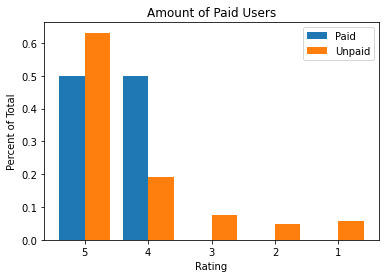

In [17]:
x_axis = np.arange(len(x_labels))
plt.bar(x_axis + 0.8, paid_reviews, 0.4, label = "Paid")
plt.bar(x_axis + 1.2, unpaid_reviews, 0.4, label = "Unpaid")

plt.title("Amount of Paid Users")
plt.xlabel("Rating")
plt.xticks([1, 2, 3, 4, 5], x_labels)
plt.ylabel("Percent of Total")
plt.legend()
plt.show()